In [1]:
import os
from PIL import Image, ImageOps, ImageChops
import numpy as np
from tensorflow import keras 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#PARAMETERS
SIZE = 100
SEED = 22

## Load Data

In [3]:
def loadData(path):
    filelist=os.listdir(path)
    class_list = []
    current_class_counter = 0
    
    all_images = []
    all_labels = []
    
    # Iterate through class folders in path
    for current_class in filelist:
        if current_class[0] == ".":
            continue
        print(current_class)
        class_list.append(current_class)
        class_path = os.listdir(path+"/"+current_class)
        
        # iterate through images in class folders
        for image in class_path:
            if image[0] == ".":
                continue
            #print(image)
            # Bild an all_images anhängen
            temp = Image.open(path+"/"+current_class+"/"+image)
            keep = temp.copy()
            all_images.append(keep)
            temp.close()
            
            # Label an all_labels anhängen
            all_labels.append(current_class_counter)
        
        current_class_counter += 1
        
    print(len(all_images)," images loaded")
        
    return all_images, all_labels, class_list

In [4]:
train_images, train_labels, train_class_list = loadData("Data/train_data")

Bicycle
Bridge
Bus
Car
Chimney
Crosswalk
Hydrant
Motorcycle
Other
Palm
Stair
Traffic Light
2432  images loaded


In [5]:
val_images, val_labels, val_class_list = loadData("Data/val_data")

Bicycle
Bridge
Bus
Car
Chimney
Crosswalk
Hydrant
Motorcycle
Other
Palm
Stair
Traffic Light
542  images loaded


In [6]:
#all_images, all_labels, class_list = loadData("Data/train_val_data")

In [7]:
def checkCorrectnesOfLabels(image_list, label_list, class_list, i):
    print(class_list[label_list[i]])
    display(image_list[i])

Bicycle


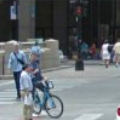

In [8]:
checkCorrectnesOfLabels(train_images, train_labels, train_class_list, 1)

Bicycle


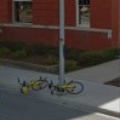

In [9]:
checkCorrectnesOfLabels(val_images, val_labels, val_class_list, 9)

## Get Overview of data

In [10]:
train_images[0].width

120

In [11]:
all_widths = []
all_heights = []
for image in train_images:
    all_widths.append(image.width)
    if image.width == 120:
        all_heights.append(image.height)
        
# -> größe der Bilder immer 100x100 oder 120x120

In [12]:
np.unique(all_widths)

array([100, 120])

## Datenpreprocessing:

In [13]:
def resizeImages(list_images):
    # Daten einheitlich auf 120x120 hochskalieren
    for i in range(len(list_images)):
        if list_images[i].width != SIZE:
            #display(list_images[i])
            new_image = list_images[i].resize((SIZE, SIZE))
            #display(new_image)

            list_images[i] = new_image
    return list_images

In [14]:
train_images = resizeImages(train_images)

In [15]:
val_images = resizeImages(val_images)

In [16]:
def checkFourthValue(list_images):
    # prüfen ob 4. wert immer 255 ist
    min_value = 2300

    for image in list_images:
        np_img = np.array(list_images[0])
        #print(np_img.shape)
        if np_img[:,:,3].min() < min_value:
            min_value = np_img[:,:,3].min()

    print(min_value)

    # -> Wert bei 4. dimension immer 255 -> kann man weglassen

In [17]:
checkFourthValue(train_images)

255


## !!!!!EVENIZING!!!!!

In [18]:
# put all togethaaaaaaa
all_images = train_images + val_images
all_labels = train_labels + val_labels
all_class_list = train_class_list

#### Overview

In [19]:
def getOverviewAmount(images, labels, class_list, return_amount_motorcycle = False, display_images = False):
    np_label = np.array(labels)
    np_images = np.array(images)
    amount_motorcycles = 0
    
    for i in range(len(class_list)):
        label_images = np_images[np_label == i]
        print(class_list[i],len(label_images))
        if class_list[i] == "Motorcycle":
            amount_motorcycles = len(label_images)
        if display_images:
            display(label_images[0])
    
    if return_amount_motorcycle:
        return amount_motorcycles
    else:
        return 

In [20]:
getOverviewAmount(all_images, all_labels, all_class_list)

Bicycle 197
Bridge 136
Bus 308
Car 895
Chimney 41
Crosswalk 316
Hydrant 242
Motorcycle 20
Other 332
Palm 231
Stair 54
Traffic Light 202


C:\Users\Jakob\AppData\Local\Temp\ipykernel_23232\3128694580.py:3: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np_images = np.array(images)
C:\Users\Jakob\AppData\Local\Temp\ipykernel_23232\3128694580.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_images = np.array(images)


#### Splitten

In [21]:
def splitData(images, labels, class_list, split_size = 0.2, rnd = SEED):
    X_train = np.array([])
    X_test = []
    y_train = []
    y_test = []
    
    np_label = np.array(labels)
    np_images = np.array(images)
    
    for i in range(len(class_list)):
        label_images = np_images[np_label == i]
        label_label = np_label[np_label == i]
        
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(label_images, label_label, test_size=split_size, random_state=rnd)
        
        X_train = np.append(X_train, X_train_temp)
        X_test = np.append(X_test, X_test_temp)
        y_train = np.append(y_train, y_train_temp)
        y_test = np.append(y_test, y_test_temp)

        
        testen = """
        print(class_list[i])
        for j in range(5):
            display(label_images[j])  
        """
    return X_train, X_test, y_train, y_test

In [22]:
image_train, image_test, label_train, label_test = splitData(all_images, all_labels, all_class_list)

C:\Users\Jakob\AppData\Local\Temp\ipykernel_23232\1804048183.py:8: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np_images = np.array(images)
C:\Users\Jakob\AppData\Local\Temp\ipykernel_23232\1804048183.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_images = np.array(images)


In [23]:
train_amount_motorcycle = getOverviewAmount(image_train, label_train, all_class_list, return_amount_motorcycle=True)

Bicycle 157
Bridge 108
Bus 246
Car 716
Chimney 32
Crosswalk 252
Hydrant 193
Motorcycle 16
Other 265
Palm 184
Stair 43
Traffic Light 161


In [24]:
train_amount_motorcycle

16

In [25]:
test_amount_motorcycle = getOverviewAmount(image_test, label_test, all_class_list, return_amount_motorcycle=True)

Bicycle 40
Bridge 28
Bus 62
Car 179
Chimney 9
Crosswalk 64
Hydrant 49
Motorcycle 4
Other 67
Palm 47
Stair 11
Traffic Light 41


In [26]:
test_amount_motorcycle

4

#### EVENAIZZZZ

In [27]:
# Evenizen mit 3-fachem vom Motorcycle

## Convert to np_array

In [28]:
def convertImageToNp(list_images):
    all_np_images = []
    for image in list_images:
        current_image = np.array(image)
        

        # 4. wert bei rgb weg machen
        current_image = current_image[:, :, :3]
        #print(current_image.shape)

        all_np_images.append(current_image)

    return np.array(all_np_images)

In [29]:
train_images_np2 = convertImageToNp(image_train)
val_images_np2 = convertImageToNp(image_test)

In [30]:
train_images_np2.shape

(2373, 100, 100, 3)

In [31]:
train_images_np2.shape

(2373, 100, 100, 3)

## Convert Label to OneHot

In [32]:
def convertToOneHot(labels):
    all_labels_np = np.array(labels)
    onehot_labels = np.zeros((all_labels_np.size, all_labels_np.max() + 1))
    onehot_labels[np.arange(all_labels_np.size), all_labels_np] = 1
    return onehot_labels

In [33]:
label_train

array([ 0.,  0.,  0., ..., 11., 11., 11.])

In [34]:
train_labels_oh2 = convertToOneHot(label_train.astype("uint8"))

In [35]:
val_labels_oh2 = convertToOneHot(label_test.astype("uint8"))

In [36]:
train_labels_oh2.shape

(2373, 12)

In [37]:
train_labels_oh2

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Splitten in train und val daten

## Build ImageDataGenerator

In [38]:
from keras.preprocessing.image import ImageDataGenerator


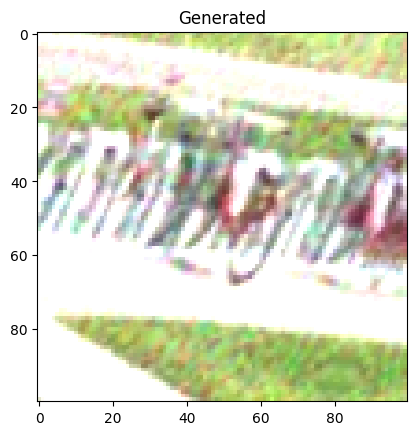

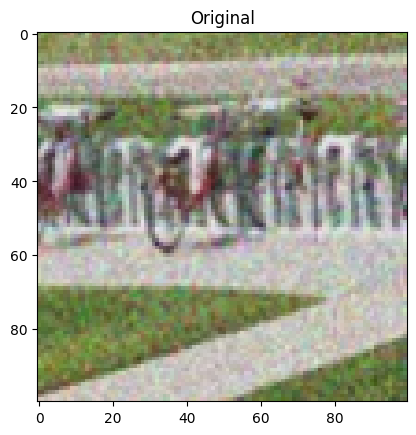

In [39]:
gen = ImageDataGenerator(rotation_range = 15, 
                         width_shift_range = (-5, 5), 
                         height_shift_range = (-5, 5), 
                         brightness_range = (1, 1.8),# (0.5,1.5), 
                         fill_mode= "reflect",
                         horizontal_flip = True,
                         shear_range=30,
                         zoom_range=[0.9, 1]
                         #validation_split=0.2
                         )


for batch in gen.flow(x = train_images_np2, y = train_labels_oh2, batch_size = 1, shuffle=False):
    
    first_image = Image.fromarray(batch[0][0].astype("uint8"))
    plt.imshow(first_image)
    plt.title("Generated")
    plt.show()
    plt.imshow(train_images_np2[0])
    plt.title("Original")
    plt.show()
    
    break

## Load CNN Model

In [40]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.models import Model
import time
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import math

In [41]:
# ResNet aufbauen
model_input = keras.Input(shape=(SIZE, SIZE, 3))

resnet50 = keras.applications.Xception(
    weights="imagenet", include_top=False, input_tensor=model_input
)

x1 = Flatten()(resnet50.output)
x2 = Dropout(0.2, seed = SEED)(x1)
x3 = Dense(128, activation="relu")(x2)
prediction = Dense(12, activation="softmax")(x3) 

resnet_model = Model(inputs = resnet50.input, outputs = prediction)

In [42]:
# kompilieren
resnet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0004), # oder: , rmsprop
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),# "categorical_crossentropy", # keras.losses.CategoricalCrossentropy(from_logits=True)
              metrics=["accuracy"])  

In [43]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 49, 49, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 49, 49, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                              

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 12, 12, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 12, 12, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_2 (Conv2D)              (None, 6, 6, 728)    186368      ['add_1[0][0]']                  
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 6, 6, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 6, 6, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 6, 6, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 6, 6, 728)   0           ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 6, 6, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 6, 6, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 6, 6, 728)   536536      ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 6, 6, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (Add)                   (None, 6, 6, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_9[0][0]']                  
                                                                                                  
 block13_sepconv1_act (Activati  (None, 6, 6, 728)   0           ['add_10[0][0]']                 
 on)      

In [44]:
MODELNAME = "xceptionizerV4"

# Set distinct name
NAME = MODELNAME+"{}".format(int(time.time()))

# Set filepath
checkpoint_filepath = 'goodModels/{}'.format(NAME)

# set up callback
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy', # val_accuracy
    mode='max',
    save_best_only=True)

callbacks = [
    EarlyStopping(monitor="val_accuracy", patience=15), #val_accuracy
    model_checkpoint_callback,
    #tensorboard
]

In [45]:
3*train_amount_motorcycle*12

576

In [46]:
3*test_amount_motorcycle*12

144

In [47]:
X_train = train_images_np2
y_train = train_labels_oh2
X_val = val_images_np2
y_val = val_labels_oh2

train_batch_size = 64
test_batch_size = 64
history = resnet_model.fit(gen.flow(X_train, y_train, batch_size=train_batch_size, shuffle=True), 
                           validation_data=gen.flow(X_val, y_val, batch_size=test_batch_size, shuffle=True),
                           steps_per_epoch=math.ceil(len(X_train)/train_batch_size), 
                           epochs=100, workers=8, callbacks= callbacks)

Epoch 1/100


C:\Users\Jakob\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


38/38 [==============================] - ETA: 0s - loss: 1.7284 - accuracy: 0.4492

INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


38/38 [==============================] - 13s 250ms/step - loss: 1.7284 - accuracy: 0.4492 - val_loss: 2.8785 - val_accuracy: 0.4010
Epoch 2/100
38/38 [==============================] - ETA: 0s - loss: 0.9814 - accuracy: 0.6886

INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


38/38 [==============================] - 9s 242ms/step - loss: 0.9814 - accuracy: 0.6886 - val_loss: 1.6241 - val_accuracy: 0.5707
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 0.7338 - accuracy: 0.7543

INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


38/38 [==============================] - 9s 242ms/step - loss: 0.7338 - accuracy: 0.7543 - val_loss: 1.5044 - val_accuracy: 0.6506
Epoch 4/100
38/38 [==============================] - ETA: 0s - loss: 0.6289 - accuracy: 0.7868

INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


38/38 [==============================] - 10s 245ms/step - loss: 0.6289 - accuracy: 0.7868 - val_loss: 1.3761 - val_accuracy: 0.6822
Epoch 5/100
38/38 [==============================] - ETA: 0s - loss: 0.5590 - accuracy: 0.8154

INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


38/38 [==============================] - 10s 250ms/step - loss: 0.5590 - accuracy: 0.8154 - val_loss: 1.6584 - val_accuracy: 0.6889
Epoch 6/100
38/38 [==============================] - ETA: 0s - loss: 0.4422 - accuracy: 0.8618

INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


38/38 [==============================] - 10s 243ms/step - loss: 0.4422 - accuracy: 0.8618 - val_loss: 1.1615 - val_accuracy: 0.7155
Epoch 7/100
38/38 [==============================] - ETA: 0s - loss: 0.4099 - accuracy: 0.8698

INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


38/38 [==============================] - 10s 250ms/step - loss: 0.4099 - accuracy: 0.8698 - val_loss: 1.1365 - val_accuracy: 0.7171
Epoch 8/100
38/38 [==============================] - 4s 80ms/step - loss: 0.5137 - accuracy: 0.8441 - val_loss: 1.2442 - val_accuracy: 0.6938
Epoch 9/100
38/38 [==============================] - ETA: 0s - loss: 0.3561 - accuracy: 0.8841

INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


INFO:tensorflow:Assets written to: goodModels\xceptionizerV41676140765\assets


38/38 [==============================] - 9s 246ms/step - loss: 0.3561 - accuracy: 0.8841 - val_loss: 1.1624 - val_accuracy: 0.7371
Epoch 10/100
38/38 [==============================] - 4s 85ms/step - loss: 0.4185 - accuracy: 0.8673 - val_loss: 1.0573 - val_accuracy: 0.7271
Epoch 11/100
38/38 [==============================] - 3s 84ms/step - loss: 0.3306 - accuracy: 0.8904 - val_loss: 1.2726 - val_accuracy: 0.7221
Epoch 12/100
30/38 [======================>.......] - ETA: 0s - loss: 0.2511 - accuracy: 0.9214

KeyboardInterrupt: 

## Model neu laden

In [48]:
vgg16_nachtr = keras.models.load_model("goodModels/xceptionizerV41676140469/")

In [49]:
# kompilieren
vgg16_nachtr.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00005), # oder: , rmsprop
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),# "categorical_crossentropy", # keras.losses.CategoricalCrossentropy(from_logits=True)
              metrics=["accuracy"])  

In [50]:
MODELNAME_nachtr = "Versuch5"

# Set distinct name
NAME_nachtr = MODELNAME_nachtr+"{}".format(int(time.time()))

# Set filepath
checkpoint_filepath_nachtr = 'goodModels/{}'.format(NAME_nachtr)

# set up callback
model_checkpoint_callback_nachtr = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_nachtr,
    save_weights_only=False,
    monitor='val_accuracy', # val_accuracy
    mode='max',
    save_best_only=True)

callbacks_nachtr = [
    EarlyStopping(monitor="val_accuracy", patience=15), #val_accuracy
    model_checkpoint_callback_nachtr,
    #tensorboard
]

In [51]:
BATCH_SIZE = 64

history = vgg16_nachtr.fit(gen.flow(X_train, y_train, batch_size=BATCH_SIZE, shuffle=True), 
                           validation_data=gen.flow(X_val, y_val, batch_size=BATCH_SIZE, shuffle=True),
                           steps_per_epoch=math.ceil(len(X_train)/BATCH_SIZE), 
                           epochs=100, workers=8, callbacks= callbacks_nachtr)

Epoch 1/100


C:\Users\Jakob\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


38/38 [==============================] - ETA: 0s - loss: 0.3179 - accuracy: 0.8968

INFO:tensorflow:Assets written to: goodModels\Versuch51676140886\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676140886\assets


38/38 [==============================] - 12s 256ms/step - loss: 0.3179 - accuracy: 0.8968 - val_loss: 0.9415 - val_accuracy: 0.7438
Epoch 2/100
38/38 [==============================] - ETA: 0s - loss: 0.2524 - accuracy: 0.9140

INFO:tensorflow:Assets written to: goodModels\Versuch51676140886\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676140886\assets


38/38 [==============================] - 10s 246ms/step - loss: 0.2524 - accuracy: 0.9140 - val_loss: 0.8006 - val_accuracy: 0.7770
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 0.2267 - accuracy: 0.9212

INFO:tensorflow:Assets written to: goodModels\Versuch51676140886\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676140886\assets


38/38 [==============================] - 10s 247ms/step - loss: 0.2267 - accuracy: 0.9212 - val_loss: 0.8300 - val_accuracy: 0.7820
Epoch 4/100
38/38 [==============================] - 4s 81ms/step - loss: 0.2040 - accuracy: 0.9254 - val_loss: 0.8077 - val_accuracy: 0.7654
Epoch 5/100
38/38 [==============================] - ETA: 0s - loss: 0.2067 - accuracy: 0.9288

INFO:tensorflow:Assets written to: goodModels\Versuch51676140886\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676140886\assets


38/38 [==============================] - 10s 251ms/step - loss: 0.2067 - accuracy: 0.9288 - val_loss: 0.8547 - val_accuracy: 0.7920
Epoch 6/100
38/38 [==============================] - 4s 83ms/step - loss: 0.1819 - accuracy: 0.9364 - val_loss: 0.8604 - val_accuracy: 0.7887
Epoch 7/100
38/38 [==============================] - 3s 81ms/step - loss: 0.1753 - accuracy: 0.9440 - val_loss: 0.8360 - val_accuracy: 0.7804
Epoch 8/100
38/38 [==============================] - 3s 83ms/step - loss: 0.1312 - accuracy: 0.9558 - val_loss: 0.9003 - val_accuracy: 0.7621
Epoch 9/100
38/38 [==============================] - 3s 83ms/step - loss: 0.1608 - accuracy: 0.9461 - val_loss: 0.8164 - val_accuracy: 0.7770
Epoch 10/100
38/38 [==============================] - 3s 80ms/step - loss: 0.1537 - accuracy: 0.9440 - val_loss: 0.8615 - val_accuracy: 0.7854
Epoch 11/100
38/38 [==============================] - 3s 83ms/step - loss: 0.1411 - accuracy: 0.9520 - val_loss: 0.8546 - val_accuracy: 0.7837
Epoch 12/100
3

## Durchlauf 2

In [52]:
vgg16_nachtr2 = keras.models.load_model("goodModels/Versuch51676140886")

In [53]:
# kompilieren
vgg16_nachtr2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), # oder: , rmsprop
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),# "categorical_crossentropy", # keras.losses.CategoricalCrossentropy(from_logits=True)
              metrics=["accuracy"])  

In [54]:
MODELNAME_nachtr = "Versuch5"

# Set distinct name
NAME_nachtr = MODELNAME_nachtr+"{}".format(int(time.time()))

# Set filepath
checkpoint_filepath_nachtr = 'goodModels/{}'.format(NAME_nachtr)

# set up callback
model_checkpoint_callback_nachtr = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_nachtr,
    save_weights_only=False,
    monitor='val_accuracy', # val_accuracy
    mode='max',
    save_best_only=True)

callbacks_nachtr = [
    EarlyStopping(monitor="val_accuracy", patience=15), #val_accuracy
    model_checkpoint_callback_nachtr,
    #tensorboard
]

In [55]:
BATCH_SIZE = 64

history = vgg16_nachtr2.fit(gen.flow(X_train, y_train, batch_size=BATCH_SIZE, shuffle=True), 
                           validation_data=gen.flow(X_val, y_val, batch_size=BATCH_SIZE, shuffle=True),
                           steps_per_epoch=math.ceil(len(X_train)/BATCH_SIZE), 
                           epochs=100, workers=8, callbacks= callbacks_nachtr)

Epoch 1/100


C:\Users\Jakob\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


38/38 [==============================] - ETA: 0s - loss: 0.1897 - accuracy: 0.9364

INFO:tensorflow:Assets written to: goodModels\Versuch51676141007\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141007\assets


38/38 [==============================] - 12s 262ms/step - loss: 0.1897 - accuracy: 0.9364 - val_loss: 0.8766 - val_accuracy: 0.7820
Epoch 2/100
38/38 [==============================] - 4s 83ms/step - loss: 0.1895 - accuracy: 0.9444 - val_loss: 0.9373 - val_accuracy: 0.7720
Epoch 3/100
38/38 [==============================] - 4s 86ms/step - loss: 0.1584 - accuracy: 0.9490 - val_loss: 0.9757 - val_accuracy: 0.7438
Epoch 4/100
38/38 [==============================] - 3s 85ms/step - loss: 0.1555 - accuracy: 0.9473 - val_loss: 0.8457 - val_accuracy: 0.7687
Epoch 5/100
38/38 [==============================] - 3s 83ms/step - loss: 0.1562 - accuracy: 0.9494 - val_loss: 0.8839 - val_accuracy: 0.7787
Epoch 6/100
38/38 [==============================] - 3s 80ms/step - loss: 0.1563 - accuracy: 0.9477 - val_loss: 0.9416 - val_accuracy: 0.7704
Epoch 7/100
38/38 [==============================] - 3s 80ms/step - loss: 0.1499 - accuracy: 0.9503 - val_loss: 0.9057 - val_accuracy: 0.7737
Epoch 8/100
38/3

INFO:tensorflow:Assets written to: goodModels\Versuch51676141007\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141007\assets


38/38 [==============================] - 10s 249ms/step - loss: 0.1559 - accuracy: 0.9456 - val_loss: 0.8160 - val_accuracy: 0.7870
Epoch 10/100
38/38 [==============================] - 4s 85ms/step - loss: 0.1578 - accuracy: 0.9536 - val_loss: 0.9105 - val_accuracy: 0.7820
Epoch 11/100
38/38 [==============================] - 3s 80ms/step - loss: 0.1412 - accuracy: 0.9503 - val_loss: 0.8514 - val_accuracy: 0.7837
Epoch 12/100
38/38 [==============================] - 3s 80ms/step - loss: 0.1590 - accuracy: 0.9440 - val_loss: 0.8867 - val_accuracy: 0.7521
Epoch 13/100
38/38 [==============================] - 3s 81ms/step - loss: 0.1533 - accuracy: 0.9452 - val_loss: 0.8458 - val_accuracy: 0.7704
Epoch 14/100
38/38 [==============================] - 3s 80ms/step - loss: 0.1504 - accuracy: 0.9473 - val_loss: 0.9062 - val_accuracy: 0.7704
Epoch 15/100
38/38 [==============================] - 3s 81ms/step - loss: 0.1419 - accuracy: 0.9570 - val_loss: 0.8440 - val_accuracy: 0.7837
Epoch 16/1

INFO:tensorflow:Assets written to: goodModels\Versuch51676141007\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141007\assets


38/38 [==============================] - 10s 252ms/step - loss: 0.1503 - accuracy: 0.9503 - val_loss: 0.8844 - val_accuracy: 0.7920
Epoch 24/100
38/38 [==============================] - 4s 81ms/step - loss: 0.1314 - accuracy: 0.9541 - val_loss: 0.8322 - val_accuracy: 0.7704
Epoch 25/100
38/38 [==============================] - 3s 83ms/step - loss: 0.1150 - accuracy: 0.9574 - val_loss: 0.8644 - val_accuracy: 0.7787
Epoch 26/100
38/38 [==============================] - 3s 84ms/step - loss: 0.1090 - accuracy: 0.9650 - val_loss: 0.8660 - val_accuracy: 0.7687
Epoch 27/100
38/38 [==============================] - 3s 84ms/step - loss: 0.1256 - accuracy: 0.9587 - val_loss: 0.8820 - val_accuracy: 0.7837
Epoch 28/100
38/38 [==============================] - 3s 84ms/step - loss: 0.1152 - accuracy: 0.9600 - val_loss: 0.9004 - val_accuracy: 0.7704
Epoch 29/100
38/38 [==============================] - 3s 84ms/step - loss: 0.1150 - accuracy: 0.9595 - val_loss: 0.8984 - val_accuracy: 0.7770
Epoch 30/1

INFO:tensorflow:Assets written to: goodModels\Versuch51676141007\assets


INFO:tensorflow:Assets written to: goodModels\Versuch51676141007\assets


38/38 [==============================] - 10s 262ms/step - loss: 0.1152 - accuracy: 0.9621 - val_loss: 0.8087 - val_accuracy: 0.7970
Epoch 31/100
38/38 [==============================] - 4s 87ms/step - loss: 0.1150 - accuracy: 0.9583 - val_loss: 0.9376 - val_accuracy: 0.7837
Epoch 32/100
38/38 [==============================] - 4s 85ms/step - loss: 0.1074 - accuracy: 0.9638 - val_loss: 0.9123 - val_accuracy: 0.7720
Epoch 33/100
38/38 [==============================] - 3s 81ms/step - loss: 0.1000 - accuracy: 0.9633 - val_loss: 0.8946 - val_accuracy: 0.7571
Epoch 34/100
38/38 [==============================] - 3s 85ms/step - loss: 0.1110 - accuracy: 0.9638 - val_loss: 0.9727 - val_accuracy: 0.7537
Epoch 35/100
38/38 [==============================] - 3s 85ms/step - loss: 0.1084 - accuracy: 0.9608 - val_loss: 0.9529 - val_accuracy: 0.7804
Epoch 36/100
38/38 [==============================] - 4s 85ms/step - loss: 0.1122 - accuracy: 0.9604 - val_loss: 0.9460 - val_accuracy: 0.7621
Epoch 37/1

In [ ]:
print("Test: ",vgg16_7239.evaluate(X_val, y_val))

In [ ]:
y_pred = vgg16_7239.predict(X_val)

In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
train_class_list

In [ ]:
def showResult(X, labels, i):
    print(train_class_list[labels[i]])
    display(Image.fromarray(X[i]))

In [ ]:
showResult(X_val, y_pred_labels, 11)

In [ ]:
resnet_model.evaluate(X_val, y_val)

In [ ]:
# Versuch 1: 56,44 % (rmsprop)
# Versuch 2: 0.7311 %  (adam, 0.0005)
# Versuch 3: 0.7311 %  (adam, 0.0003)
0.7057

In [ ]:
# optimizer
# batch size
# datagenerator
# rauschen
# kontrolliertes splitten der Train Val daten, sodass klassen einheitlich repräsentiert sind


In [ ]:
annähernd gleich viele Daten pro Klasse
 - erhöhen oder verringern?
 - händisch die ganz schlimmen aus dem Datensatz rausschmeißen